In [13]:
import pandas as pd
import chess
import chess.svg
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
import cairosvg
from stockfish import Stockfish
import re
import base64



In [2]:
dataset_pd = pd.read_csv("lichess_db_puzzle.csv")



In [3]:
dataset_pd.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4679273 entries, 0 to 4679272
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   PuzzleId         object
 1   FEN              object
 2   Moves            object
 3   Rating           int64 
 4   RatingDeviation  int64 
 5   Popularity       int64 
 6   NbPlays          int64 
 7   Themes           object
 8   GameUrl          object
 9   OpeningTags      object
dtypes: int64(4), object(6)
memory usage: 357.0+ MB


In [8]:
dataset_pd.head()

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1925,75,95,7373,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1547,73,96,30105,advantage endgame short,https://lichess.org/F8M8OS71#53,NaN
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1266,75,90,678,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,NaN
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1093,74,87,582,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...
4,000VW,r4r2/1p3pkp/p5p1/3R1N1Q/3P4/8/P1q2P2/3R2K1 b -...,g6f5 d5c5 c2e4 h5g5 g7h8 g5f6,2793,100,91,225,crushing endgame long,https://lichess.org/e9AY2m5j/black#50,NaN


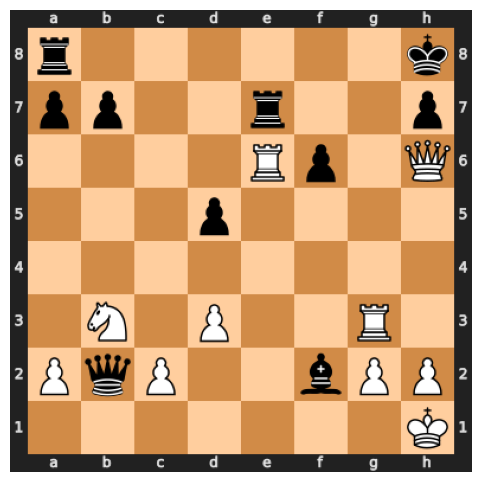

In [14]:
# Select a random sample or first few rows to visualize
sample_fen = dataset_pd["FEN"].iloc[0]  # You can change the index for other positions

# Create the chess board from FEN notation
board = chess.Board(sample_fen)

# Convert the board into an SVG image
board_svg = chess.svg.board(board)

# Convert SVG to PNG for matplotlib display
png_data = cairosvg.svg2png(bytestring=board_svg)
image = Image.open(BytesIO(png_data))

# Display the chessboard using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis("off")
plt.show()

In [9]:
data_fen_notation = dataset_pd['FEN']

data_fen_notation.head()[0]

'r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - - 0 24'

In [11]:

def get_player_to_move(fen):
    pattern = r"(?:\S+\s)([wb])"
    match = re.search(pattern, fen)
    if match:
        return 0 if match.group(1) == "w" else 1


# Example usage
fen_string = "r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - - 0 24"
print(get_player_to_move(fen_string))

1


In [ ]:

# Create the chess board from FEN notation
board = chess.Board(sample_fen)

# Convert the board into an SVG image
board_svg = chess.svg.board(board)

# Convert SVG to PNG for matplotlib display
png_data = cairosvg.svg2png(bytestring=board_svg)
image = Image.open(BytesIO(png_data))

# Display the chessboard using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis("off")
plt.show()


def play_stockfish_game(sample_fen, stockfish_path):

    
    stockfish2 = Stockfish(path=stockfish_path)
    stockfish2.set_depth(20)#How deep the AI looks
    stockfish2.set_skill_level(20)#Highest rank stockfish
    stockfish2.set_fen_position(sample_fen)
    final_moves = stockfish2.get_top_moves(5)
    top_moves_list = [m['Move'] for m in final_moves] if final_moves else []

    board = chess.Board(sample_fen)
    svg_data = chess.svg.board(board=board)

    svg_data = chess.svg.board(board=board)
    png_data = cairosvg.svg2png(bytestring=svg_data.encode('utf-8'))
    png_base64 = base64.b64encode(png_data).decode('utf-8')
    player_to_play = 0
    
    
    pattern = r"(?:\S+\s)([wb])"
    match = re.search(pattern, sample_fen)
    if match:
        player_to_play =  0 if match.group(1) == "w" else 1
        
        
    result = {
        "State": {
            "Image state": png_base64,
            "Fen notation": board.fen(),
            "Pgn notation": ""
        },
        "player_to_play": bool(player_to_play),
        "Best_5_moves": top_moves_list
    }

    return result

# def generate_data_points_for_thread(start_index, end_index, stockfish_path, output_file):
#     """Generate a portion of data points and save to output_file in NDJSON format."""
#     with open(output_file, 'w', encoding='utf-8') as f:
#         for i in range(start_index, end_index):
#             data_point = play_stockfish_game(i, stockfish_path)
#             f.write(json.dumps(data_point) + '\n')

# def create_ndjson_dataset(total_data_points=10000, filename='chess_data.ndjson', num_threads=8, stockfish_path='path_to_stockfish'):
#     # Divide total_data_points among threads
#     chunk_size = total_data_points // num_threads
#     remainder = total_data_points % num_threads

#     futures = []
#     temp_files = []

#     with ThreadPoolExecutor(max_workers=num_threads) as executor:
#         start = 0
#         for t in range(num_threads):
#             end = start + chunk_size + (1 if t < remainder else 0)
#             # Create a temporary file for each thread
#             temp_fd, temp_path = tempfile.mkstemp(suffix='.ndjson')
#             os.close(temp_fd)  # Close file descriptor, will use path directly
#             temp_files.append(temp_path)

#             futures.append(executor.submit(generate_data_points_for_thread, start, end, stockfish_path, temp_path))
#             start = end

#     # Wait for all threads to finish
#     for f in futures:
#         f.result()  # Will raise exceptions if any occurred

#     # Concatenate all temporary files into the final file
#     with open(filename, 'w', encoding='utf-8') as outfile:
#         for tf in temp_files:
#             with open(tf, 'r', encoding='utf-8') as infile:
#                 for line in infile:
#                     outfile.write(line)
#             # Remove temporary file after merging
#             os.remove(tf)
 
